<a href="https://colab.research.google.com/github/Vicks-2019/Datatrained/blob/master/EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
import pandas as pd
df = pd.read_csv('drug_review_dataset_with_sentiment.csv')
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,arb blocker,0.000000,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,NaN,0.168333,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,NaN,0.067210,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,NaN,0.179545,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,NaN,0.194444,positive


In [6]:
df.shape

(161297, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       161297 non-null  int64  
 1   drugName         161297 non-null  object 
 2   condition        160398 non-null  object 
 3   review           161297 non-null  object 
 4   rating           161297 non-null  float64
 5   date             161297 non-null  object 
 6   usefulCount      161297 non-null  int64  
 7   drug_class       23460 non-null   object 
 8   sentiment        161297 non-null  float64
 9   sentiment_label  161297 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 12.3+ MB


In [8]:
print(df.groupby('drugName').size())

drugName
A + D Cracked Skin Relief                1
A / B Otic                               1
Abacavir / dolutegravir / lamivudine    52
Abacavir / lamivudine / zidovudine       1
Abatacept                               19
                                        ..
Zyvox                                   17
ZzzQuil                                  2
depo-subQ provera 104                    1
ella                                    51
femhrt                                   3
Length: 3436, dtype: int64


In [9]:
print(df.groupby('sentiment_label').size())

sentiment_label
negative     53303
neutral       6953
positive    101041
dtype: int64


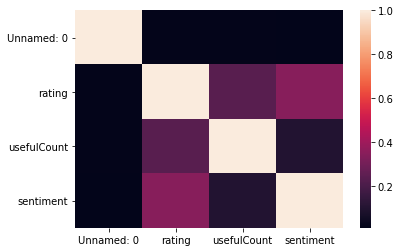

In [10]:
sns.heatmap(df.corr())

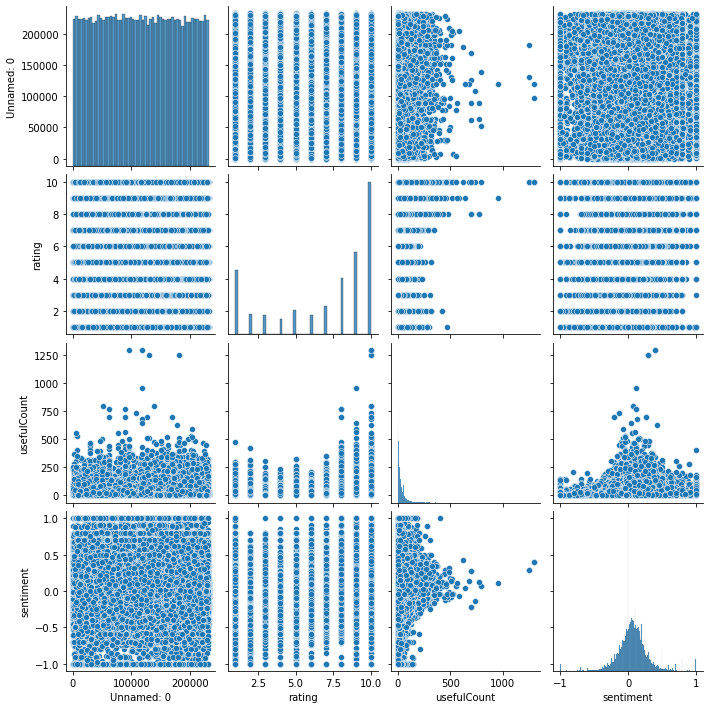

In [11]:
sns.pairplot(df)

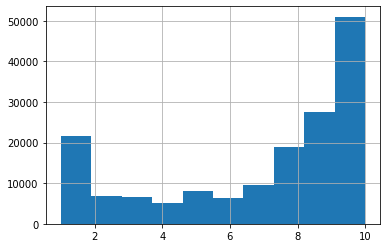

In [12]:
# Distribution of rating
df['rating'].hist()
plt.show()

In [13]:
df1 = print(df.groupby(df['drugName']).count())

                                      Unnamed: 0  ...  sentiment_label
drugName                                          ...                 
A + D Cracked Skin Relief                      1  ...                1
A / B Otic                                     1  ...                1
Abacavir / dolutegravir / lamivudine          52  ...               52
Abacavir / lamivudine / zidovudine             1  ...                1
Abatacept                                     19  ...               19
...                                          ...  ...              ...
Zyvox                                         17  ...               17
ZzzQuil                                        2  ...                2
depo-subQ provera 104                          1  ...                1
ella                                          51  ...               51
femhrt                                         3  ...                3

[3436 rows x 9 columns]


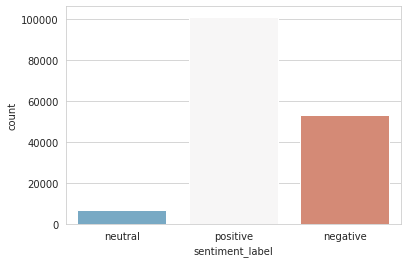

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment_label',data=df,palette='RdBu_r')

In [20]:
df4 = print(df.groupby('sentiment_label').nunique())

                 Unnamed: 0  drugName  ...  drug_class  sentiment
sentiment_label                        ...                       
negative              53303      2388  ...          22      17726
neutral                6953      1534  ...          22          1
positive             101041      3091  ...          22      28180

[3 rows x 9 columns]


In [45]:
print(df.drugName.value_counts())

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Desonate                                1
Purinethol                              1
Pima                                    1
Prednicot                               1
Fortamet                                1
Name: drugName, Length: 3436, dtype: int64


In [39]:
print(df.drug_class.value_counts())

antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_class, dtype: int64


In [48]:
df4 = print(df.groupby('condition').nunique())

                                              Unnamed: 0  ...  sentiment_label
condition                                                 ...                 
0</span> users found this comment helpful.           104  ...                3
10</span> users found this comment helpful.           28  ...                3
110</span> users found this comment helpful.           1  ...                1
11</span> users found this comment helpful.           10  ...                3
121</span> users found this comment helpful.           1  ...                1
...                                                  ...  ...              ...
unctional Gastric Disorde                              1  ...                1
ungal Infection Prophylaxis                            1  ...                1
ungal Pneumonia                                        1  ...                1
von Willebrand's Disease                               7  ...                1
zen Shoulde                                         

In [52]:
df.groupby(['drugName','condition']).size().groupby(level=1).max()

condition
0</span> users found this comment helpful.      21
10</span> users found this comment helpful.      1
110</span> users found this comment helpful.     1
11</span> users found this comment helpful.      1
121</span> users found this comment helpful.     1
                                                ..
unctional Gastric Disorde                        1
ungal Infection Prophylaxis                      1
ungal Pneumonia                                  1
von Willebrand's Disease                         3
zen Shoulde                                      3
Length: 884, dtype: int64

In [55]:
df['CONTER'] = 1 
group_data = df.groupby(['drugName','Unnamed: 0']).sum()
print(group_data)

                                                 rating  ...  CONTER
drugName                             Unnamed: 0          ...        
A + D Cracked Skin Relief            163935        10.0  ...       1
A / B Otic                           131173        10.0  ...       1
Abacavir / dolutegravir / lamivudine 70681          5.0  ...       1
                                     70684          4.0  ...       1
                                     70686          7.0  ...       1
...                                                 ...  ...     ...
ella                                 163141        10.0  ...       1
                                     163142        10.0  ...       1
femhrt                               53296         10.0  ...       1
                                     53297          1.0  ...       1
                                     53300          1.0  ...       1

[161297 rows x 4 columns]
